# 

<div align="center">

## Proyecto Modulo 1.- El *TITANIC* **EDA**

<div>

## **Introducci칩n**

##### En este proyecto, hemos realizado un an치lisis exhaustivo de los datos del Titanic para identificar los factores que influenciaron la supervivencia de los pasajeros. Utilizamos t칠cnicas avanzadas de an치lisis de datos y visualizaci칩n para desentra침ar patrones y tendencias. Nuestro objetivo es encontrar respuestas concluyentes sobre c칩mo las clases sociales afectaron las probabilidades de supervivencia.


In [2]:
#importamos librerias necesarias.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from IPython.display import Image, display, HTML
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

##### 1. Creamos y visualizamos nuestro df, a raiz del csv que optimizamos en el Procesamiento de datos

In [6]:
# Crear el DataFrame a partir del archivo CSV
df_Knn = pd.read_csv('')
df_Knn.head()


Survived  Pclass                                               Name  \
0     False       3                            Braund, Mr. Owen Harris   
1      True       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2      True       3                             Heikkinen, Miss. Laina   
3      True       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4     False       3                           Allen, Mr. William Henry   

      Sex  Age  SibSp  Parch  Ticket      Fare Embarked   LastName  
0    male   22      1      0     523 -0.502445        S     Braund  
1  female   38      1      0     596  0.786845        C    Cumings  
2  female   26      0      0     669 -0.488854        S  Heikkinen  
3  female   35      1      0      49  0.420730        S   Futrelle  
4    male   35      0      0     472 -0.486337        S      Allen

##### 2. N칰mero de viajeros y n칰mero de supervivientes.

Total de pasajeros: 891
Supervivientes: 342
No supervivientes: 549


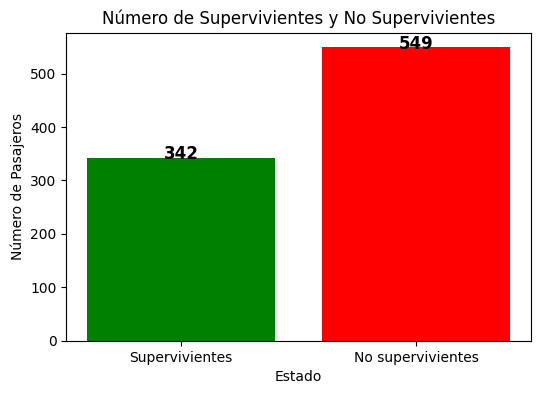

In [10]:
# N칰mero total de pasajeros
total_passengers = df_Knn.shape[0]

# N칰mero de supervivientes y no supervivientes
survived_count = df_Knn['Survived'].sum()
not_survived_count = total_passengers - survived_count

print(f"Total de pasajeros: {total_passengers}")
print(f"Supervivientes: {survived_count}")
print(f"No supervivientes: {not_survived_count}")

# Datos para la gr치fica
labels = ['Supervivientes', 'No supervivientes']
counts = [survived_count, not_survived_count]

# Crear la gr치fica de barras
plt.figure(figsize=(6, 4))
bars = plt.bar(labels, counts, color=['green', 'red'])

# A침adir etiquetas a las barras con color negro
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 10, count, ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.xlabel('Estado')
plt.ylabel('N칰mero de Pasajeros')
plt.title('N칰mero de Supervivientes y No Supervivientes')
plt.show()


## Objetivo del An치lisis

El prop칩sito de nuestro an치lisis es ilustrar el impacto que las clases sociales tuvieron en la supervivencia de los pasajeros del Titanic. A continuaci칩n, exploraremos c칩mo se distribu칤an estas clases a bordo del transatl치ntico y qu칠 patrones emergen de esta distribuci칩n.


In [11]:
# Contar el n칰mero de pasajeros por clase
passengers_per_class = df_Knn['Pclass'].value_counts()

print(passengers_per_class)


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


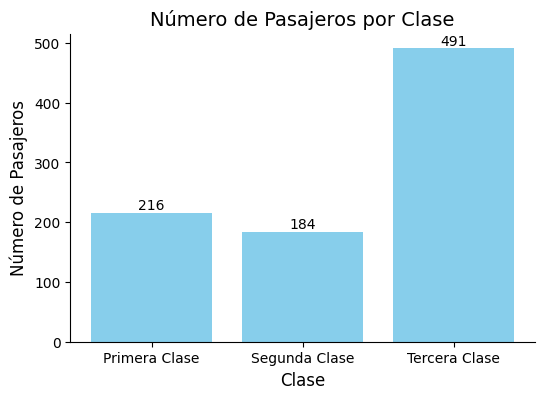

In [12]:
# Contar el n칰mero de pasajeros por clase
passengers_per_class = df_Knn['Pclass'].value_counts()

# Crear la gr치fica de barras minimalista
plt.figure(figsize=(6, 4))
bars = plt.bar(passengers_per_class.index, passengers_per_class.values, color='skyblue')

# A침adir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height}', ha='center', va='bottom', color='black')

# T칤tulos y etiquetas
plt.title('N칰mero de Pasajeros por Clase', fontsize=14)
plt.xlabel('Clase', fontsize=12)
plt.ylabel('N칰mero de Pasajeros', fontsize=12)
plt.xticks([1, 2, 3], ['Primera Clase', 'Segunda Clase', 'Tercera Clase'])

# Eliminar bordes superiores y laterales
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Mostrar la gr치fica
plt.show()


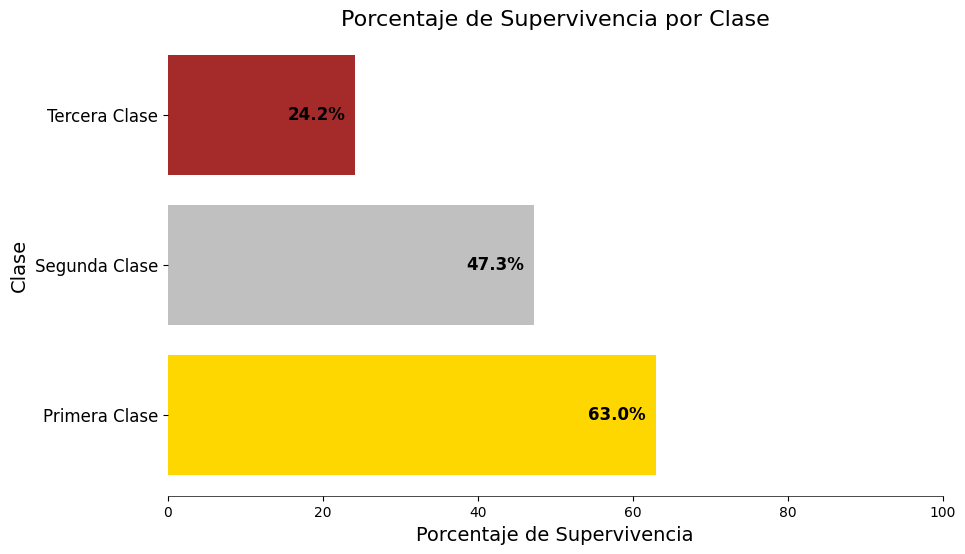

In [13]:
# Agrupar por clase y calcular porcentajes de supervivencia
pclass_survival = df_Knn.groupby('Pclass')['Survived'].mean() * 100

# Crear la gr치fica de barras horizontales
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(pclass_survival.index, pclass_survival.values, color=['gold', 'silver', 'brown'])

# A침adir t칤tulos y etiquetas
ax.set_title('Porcentaje de Supervivencia por Clase', fontsize=16)
ax.set_xlabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)

# A침adir etiquetas de porcentaje en cada barra
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# Mejorar la apariencia de la gr치fica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()

---

### Porcentaje de Supervivencia por Clase

Esta gr치fica horizontal ilustra el porcentaje de supervivencia de los pasajeros del Titanic seg칰n su clase de viaje. Cada barra representa una clase diferente, con colores espec칤ficos para destacar visualmente la comparaci칩n:

- **Primera Clase (Oro)**: Los pasajeros de primera clase tuvieron la tasa de supervivencia m치s alta.
- **Segunda Clase (Plata)**: La segunda clase muestra una tasa de supervivencia intermedia.
- **Tercera Clase (Bronce)**: Los pasajeros de tercera clase presentaron la tasa de supervivencia m치s baja.

Esta visualizaci칩n resalta claramente c칩mo la clase socioecon칩mica influenci칩 las probabilidades de supervivencia durante el desastre del Titanic.

---

### Relaci칩n entre el Coste del Billete y la Supervivencia

Ahora que hemos analizado el 칤ndice de supervivencia por clase, procederemos a investigar si el coste del billete tambi칠n tuvo un impacto significativo en las probabilidades de supervivencia. Evaluar c칩mo las tarifas pagadas pudieron influir en este tr치gico evento nos permitir치 obtener una visi칩n m치s profunda de las disparidades socioecon칩micas a bordo del Titanic.



Fare_Quartile
Barato        19.730942
Medio-Bajo    30.357143
Medio-Alto    45.495495
Caro          58.108108
Name: Survived, dtype: float64


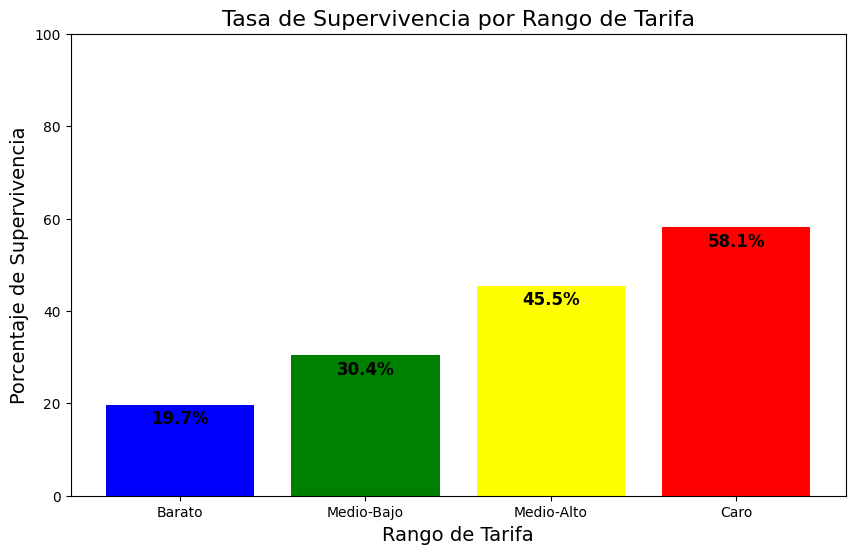

In [14]:
# Definir cuartiles para las tarifas
df_Knn['Fare_Quartile'] = pd.qcut(df_Knn['Fare'], 4, labels=['Barato', 'Medio-Bajo', 'Medio-Alto', 'Caro'])

# Calcular la tasa de supervivencia para cada cuartil
fare_survival = df_Knn.groupby('Fare_Quartile')['Survived'].mean() * 100

print(fare_survival)

# Visualizar las tasas de supervivencia por cuartil
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(fare_survival.index, fare_survival.values, color=['blue', 'green', 'yellow', 'red'])

# A침adir t칤tulos y etiquetas
ax.set_title('Tasa de Supervivencia por Rango de Tarifa', fontsize=16)
ax.set_xlabel('Rango de Tarifa', fontsize=14)
ax.set_ylabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylim(0, 100)

# A침adir etiquetas de porcentaje en cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height:.1f}%', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

plt.show()


### Tasa de Supervivencia por Rango de Tarifa

La gr치fica siguiente representa la tasa de supervivencia de los pasajeros del Titanic desglosada por cuartiles de tarifa. Cada barra muestra el porcentaje de supervivencia para diferentes rangos de tarifas pagadas:

- **Barato:** Tarifa baja
- **Medio-Bajo:** Tarifa medio-baja
- **Medio-Alto:** Tarifa medio-alta
- **Caro:** Tarifa alta

#### Observaciones Clave
- Los pasajeros que pagaron tarifas m치s altas (`Caro`) tuvieron una mayor tasa de supervivencia.
- A medida que la tarifa pagada disminuye, tambi칠n disminuye la tasa de supervivencia.

Esta visualizaci칩n subraya c칩mo el coste del billete influy칩 significativamente en las probabilidades de supervivencia, evidenciando las disparidades socioecon칩micas a bordo del Titanic.

---

## Supervivencia del sexo femenino

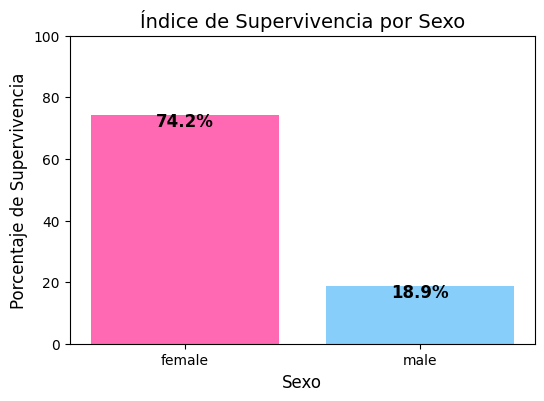

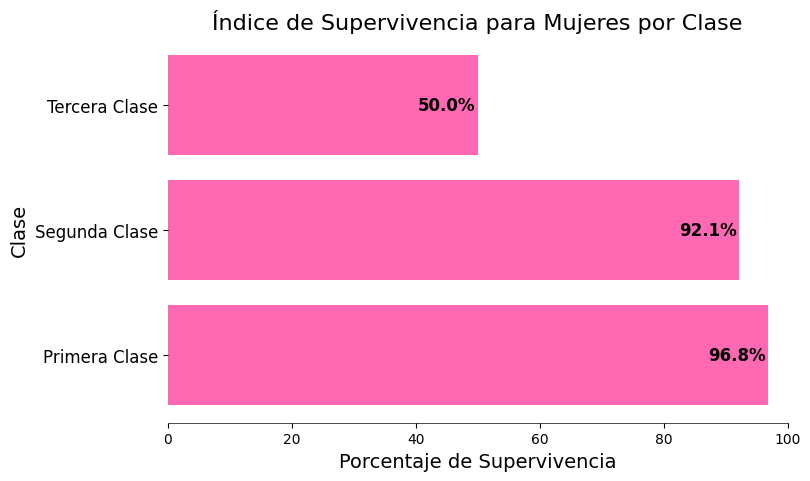

In [15]:
# Calcular el 칤ndice de supervivencia por sexo
sex_survival = df_Knn.groupby('Sex')['Survived'].mean() * 100

# Visualizar el 칤ndice de supervivencia por sexo
plt.figure(figsize=(6, 4))
bars = plt.bar(sex_survival.index, sex_survival.values, color=['#FF69B4', '#87CEFA'])  # Rosa para mujeres, azul para hombres
for bar, count in zip(bars, sex_survival.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{count:.1f}%', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
plt.title('칈ndice de Supervivencia por Sexo', fontsize=14)
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Porcentaje de Supervivencia', fontsize=12)
plt.ylim(0, 100)
plt.show()

# Calcular el 칤ndice de supervivencia para mujeres por clase
women_survival_by_class = df_Knn[df_Knn['Sex'] == 'female'].groupby('Pclass')['Survived'].mean() * 100

# Visualizar el 칤ndice de supervivencia para mujeres por clase
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(women_survival_by_class.index, women_survival_by_class.values, color='#FF69B4')  # Rosa para mujeres
for bar in bars:
    width = bar.get_width()
    ax.text(width - 5, bar.get_y() + bar.get_height()/2, f'{width:.1f}%', ha='center', va='center', color='black', fontsize=12, fontweight='bold')
ax.set_title('칈ndice de Supervivencia para Mujeres por Clase', fontsize=16)
ax.set_xlabel('Porcentaje de Supervivencia', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_xlim(0, 100)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
plt.show()


### An치lisis del 칈ndice de Supervivencia por Sexo y Clase

#### 칈ndice de Supervivencia por Sexo
La siguiente gr치fica muestra el 칤ndice de supervivencia de los pasajeros del Titanic, desglosado por sexo. Observamos una tasa significativamente mayor de supervivencia entre las mujeres, lo cual concuerda con las pol칤ticas de "mujeres y ni침os primero" implementadas durante el desastre.


#### 칈ndice de Supervivencia para Mujeres por Clase
Esta gr치fica se centra en la tasa de supervivencia de las mujeres, analizando c칩mo la clase socioecon칩mica influy칩 en sus probabilidades de supervivencia. Los resultados son los siguientes:

- **Primera Clase:** Las mujeres de primera clase muestran la tasa de supervivencia m치s alta.
- **Segunda Clase:** Las mujeres de segunda clase presentan una tasa de supervivencia intermedia.
- **Tercera Clase:** Las mujeres de tercera clase tienen la tasa de supervivencia m치s baja.



#### Conclusi칩n
Este an치lisis evidencia que tanto el g칠nero como la clase socioecon칩mica tuvieron un impacto significativo en las probabilidades de supervivencia durante el desastre del Titanic. Las pol칤ticas de rescate priorizaron a las mujeres, y las clases socioecon칩micas superiores tuvieron mayores ventajas en t칠rminos de acceso a recursos de rescate.

---



### An치lisis de Supervivencia por Grupo de Edad

En esta secci칩n, analizaremos c칩mo la edad de los pasajeros del Titanic influy칩 en sus probabilidades de supervivencia. Dividiremos a los pasajeros en distintos grupos de edad para identificar patrones y tendencias que nos permitan comprender mejor las din치micas de supervivencia entre diferentes segmentos etarios.






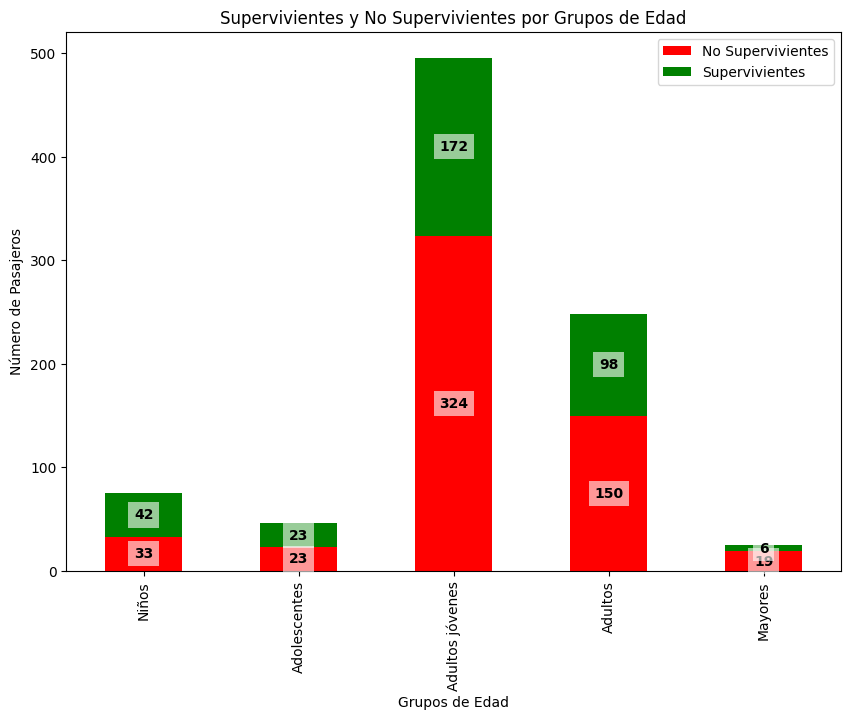

In [18]:
# Crear los grupos de edad
bins = [0, 12, 18, 35, 60, 80]
labels = ['Ni침os', 'Adolescentes', 'Adultos j칩venes', 'Adultos', 'Mayores']
df_Knn['AgeGroup'] = pd.cut(df_Knn['Age'], bins=bins, labels=labels, right=False)

# Agrupar por grupos de edad y estado de supervivencia
age_group_survival = df_Knn.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)

# Crear la gr치fica de barras
fig, ax = plt.subplots(figsize=(10, 7))
age_group_survival.plot(kind='bar', stacked=True, color=['red', 'green'], ax=ax)

# A침adir bocadillos con n칰meros
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:
        ax.text(x + width / 2, y + height / 2, int(height), ha='center', va='center', color='black', fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.title('Supervivientes y No Supervivientes por Grupos de Edad')
plt.xlabel('Grupos de Edad')
plt.ylabel('N칰mero de Pasajeros')
plt.legend(['No Supervivientes', 'Supervivientes'])
plt.show()


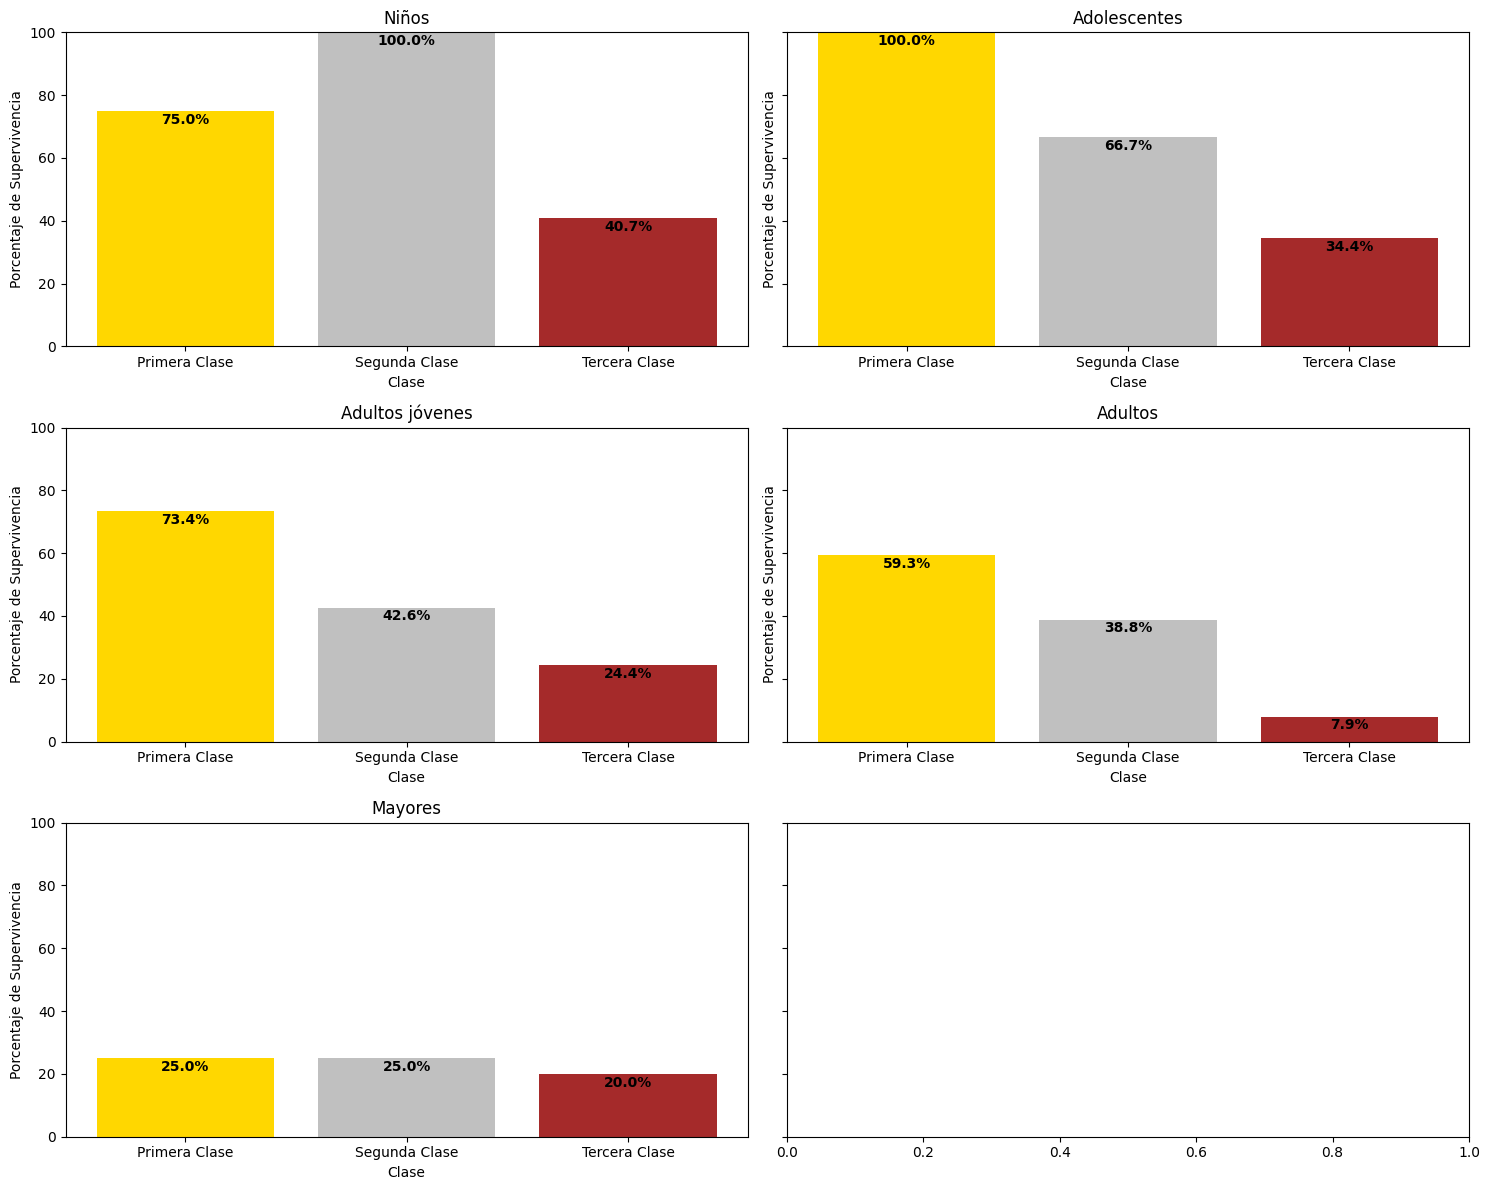

In [20]:
# Crear los grupos de edad
bins = [0, 12, 18, 35, 60, 80]
labels = ['Ni침os', 'Adolescentes', 'Adultos j칩venes', 'Adultos', 'Mayores']
df_Knn['AgeGroup'] = pd.cut(df_Knn['Age'], bins=bins, labels=labels, right=False)

# Agrupar por grupos de edad, clase y estado de supervivencia
age_class_survival = df_Knn.groupby(['AgeGroup', 'Pclass'])['Survived'].mean() * 100

# Crear una figura y ejes para m칰ltiples subgr치ficas
fig, axes = plt.subplots(3, 2, figsize=(15, 12), sharey=True)
axes = axes.flatten()

# Filtrar las subgr치ficas vac칤as
valid_axes = [ax for i, ax in enumerate(axes) if i < len(age_class_survival.index.levels[0])]

# Definir colores para cada clase
colors = {1: 'gold', 2: 'silver', 3: 'brown'}

# Dibujar subgr치ficas para cada grupo de edad
for (age_group, ax) in zip(age_class_survival.index.levels[0], valid_axes):
    data = age_class_survival[age_group]
    bars = ax.bar(data.index, data.values, color=[colors[i] for i in data.index])
    ax.set_title(f'{age_group}')
    ax.set_xlabel('Clase')
    ax.set_ylabel('Porcentaje de Supervivencia')
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])
    ax.set_ylim(0, 100)

    # A침adir etiquetas de porcentaje en cada barra
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height:.1f}%', ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Ajustar el espaciado
plt.tight_layout()
plt.show()


### An치lisis de Supervivencia por Grupo de Edad y Clase

En este an치lisis, hemos dividido a los pasajeros del Titanic en distintos grupos de edad para investigar c칩mo la clase influy칩 en sus probabilidades de supervivencia dentro de cada segmento etario.

*La visualizaci칩n presenta subgr치ficas para cada grupo de edad, mostrando el porcentaje de supervivientes en primera, segunda y tercera clase. Colores distintivos representan cada clase: oro para primera clase, plata para segunda clase y bronce para tercera clase.*

#### Observaciones Clave
- **Ni침os:** Los ni침os en primera clase tuvieron las tasas de supervivencia m치s altas.
- **Adolescentes:** La tasa de supervivencia var칤a notablemente entre clases.
- **Adultos J칩venes y Adultos:** La clase sigue siendo un factor determinante, con mayores tasas de supervivencia.

---

### An치lisis de Supervivencia por Grupos Familiares

En esta secci칩n, analizaremos cu치ntos grupos de familias completos podemos encontrar, en qu칠 clase viajaban cada uno y cu치l fue su 칤ndice de supervivencia. Adem치s, exploraremos si la clase tambi칠n tuvo influencia en la supervivencia de estos grupos familiares.





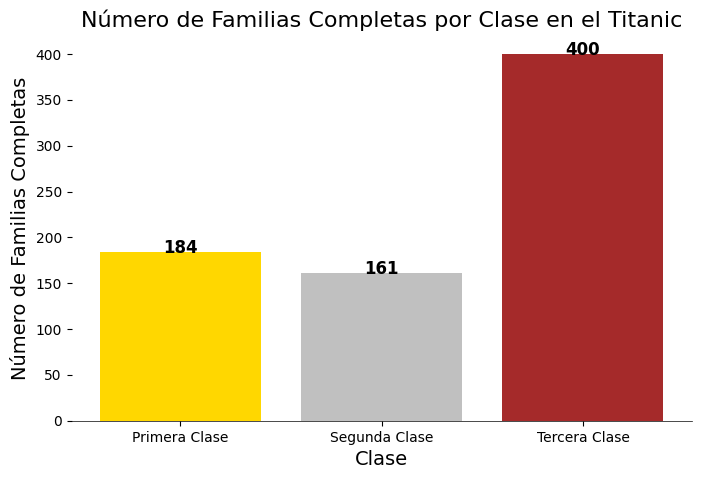

In [21]:
# Crear un identificador de familia basado en el apellido y el tama침o del grupo
df_Knn['LastName'] = df_Knn['Name'].apply(lambda x: x.split(',')[0])
df_Knn['FamilyID'] = df_Knn['LastName'] + '_' + df_Knn['SibSp'].astype(str) + df_Knn['Parch'].astype(str)

# Agrupar por FamilyID y clase para contar el n칰mero de familias por clase
family_class_counts = df_Knn.groupby(['FamilyID', 'Pclass']).size().unstack().notnull().sum()

# Crear la gr치fica de barras para visualizar el n칰mero de familias completas por clase
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(family_class_counts.index, family_class_counts.values, color=['gold', 'silver', 'brown'])

# A침adir t칤tulos y etiquetas
ax.set_title('N칰mero de Familias Completas por Clase en el Titanic', fontsize=16)
ax.set_xlabel('Clase', fontsize=14)
ax.set_ylabel('N칰mero de Familias Completas', fontsize=14)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'])

# A침adir etiquetas de n칰mero en cada barra
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height - 5, f'{height}', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

# Mejorar la apariencia de la gr치fica
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)

plt.show()


<bound method Spine.set of <matplotlib.spines.Spine object at 0x000001AE32162650>>

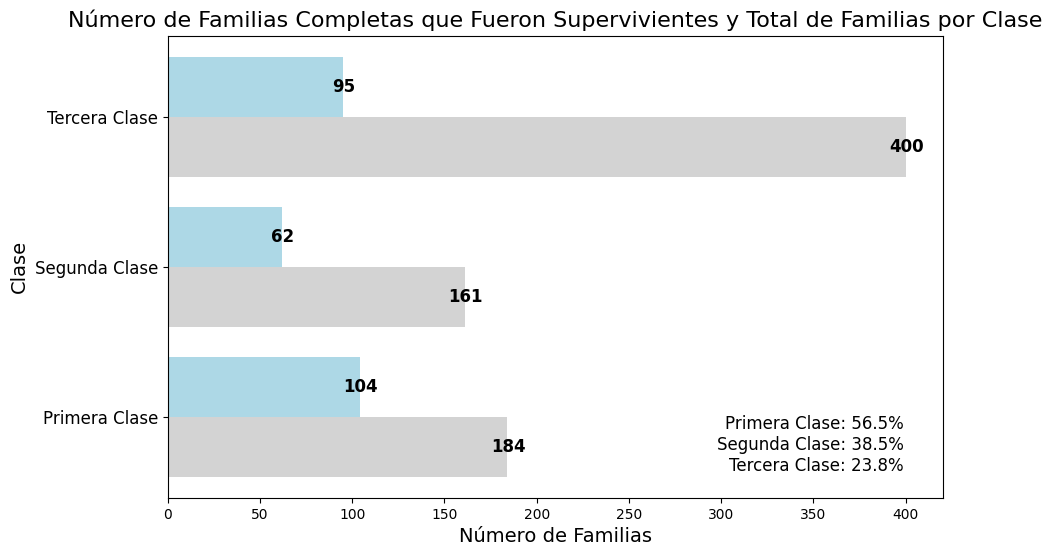

In [24]:
# Crear un identificador de familia basado en el apellido y el tama침o del grupo
df_Knn['LastName'] = df_Knn['Name'].apply(lambda x: x.split(',')[0])
df_Knn['FamilyID'] = df_Knn['LastName'] + '_' + df_Knn['SibSp'].astype(str) + df_Knn['Parch'].astype(str)

# Agrupar por FamilyID y calcular el n칰mero de supervivientes por familia
family_survival = df_Knn.groupby('FamilyID').agg({'Survived': ['sum', 'count'], 'Pclass': 'first'})

# Identificar familias completas que fueron supervivientes
family_survival.columns = ['Survived_Sum', 'Family_Size', 'Pclass']
family_survival['CompleteSurvival'] = family_survival['Survived_Sum'] == family_survival['Family_Size']
complete_survival_families = family_survival[family_survival['CompleteSurvival']]

# Contar el n칰mero de familias completas que fueron supervivientes por clase
family_class_survival = complete_survival_families.groupby('Pclass').size()

# Contar el n칰mero total de familias que viajaban en cada clase
total_families_per_class = df_Knn.groupby('Pclass')['FamilyID'].nunique()

# Calcular el porcentaje de familias completas que fueron supervivientes por clase
percent_family_survival = (family_class_survival / total_families_per_class) * 100

# Crear la gr치fica de barras horizontales
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las barras para el n칰mero total de familias
bars_total = ax.barh(total_families_per_class.index - 0.2, total_families_per_class.values, height=0.4, color='lightgrey', label='Total de Familias')

# Dibujar las barras para las familias completas que fueron supervivientes
bars_survived = ax.barh(family_class_survival.index + 0.2, family_class_survival.values, height=0.4, color='#ADD8E6', label='Familias Supervivientes')  # Azul muy claro

# A침adir t칤tulos y etiquetas
ax.set_title('N칰mero de Familias Completas que Fueron Supervivientes y Total de Familias por Clase', fontsize=16)
ax.set_xlabel('N칰mero de Familias', fontsize=14)
ax.set_ylabel('Clase', fontsize=14)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(['Primera Clase', 'Segunda Clase', 'Tercera Clase'], fontsize=12)

# A침adir etiquetas de n칰mero en cada barra
for bar in bars_total:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

for bar in bars_survived:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', ha='center', va='center', color='black', fontsize=12, fontweight='bold')

# A침adir cuadro con porcentajes dentro de la gr치fica
percent_text = f'Primera Clase: {percent_family_survival[1]:.1f}%\nSegunda Clase: {percent_family_survival[2]:.1f}%\nTercera Clase: {percent_family_survival[3]:.1f}%'
props = dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='none')
ax.text(0.95, 0.05, percent_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right', bbox=props)

# Mejorar la apariencia de la gr치fica
ax.spines['top'].set

### N칰mero de Familias Completas que Fueron Supervivientes y Total de Familias por Clase

En este an치lisis, hemos investigado la cantidad de familias completas que viajaban en el Titanic y su distribuci칩n por clase. Adem치s, hemos identificado cu치ntas de estas familias completas sobrevivieron. La visualizaci칩n se presenta en una gr치fica de barras horizontales, diferenciando entre el n칰mero total de familias y las familias completas que sobrevivieron, utilizando colores distintivos:

- **Total de Familias (Gris claro)**: Representa el n칰mero total de familias que viajaban en cada clase.
- **Familias Supervivientes (Azul claro)**: Representa el n칰mero de familias completas que lograron sobrevivir.

#### Observaciones Clave
- **Primera Clase**: Muestra un n칰mero significativo de familias completas, y una proporci칩n considerable de ellas logr칩 sobrevivir.
- **Segunda Clase**: Tiene una cantidad moderada de familias completas, con algunas de ellas sobreviviendo.
- **Tercera Clase**: Presenta el mayor n칰mero de familias completas, pero una proporci칩n menor de ellas logr칩 sobrevivir, lo que refleja las desventajas enfrentadas por este grupo durante el desastre.

Esta visualizaci칩n nos permite comprender mejor la din치mica de las familias completas en diferentes clases socioecon칩micas y c칩mo influy칩 en sus probabilidades de supervivencia durante el evento tr치gico del Titanic.

---

# Resumen Final del An치lisis Exploratorio de Datos (EDA) del Titanic 游뚹

## Introducci칩n
Este an치lisis exploratorio de datos (EDA) del Titanic nos ha permitido descubrir y entender los diversos factores que influenciaron la supervivencia de los pasajeros. A trav칠s de t칠cnicas avanzadas de an치lisis de datos y visualizaci칩n, hemos identificado patrones y tendencias que revelan las din치micas socioecon칩micas y demogr치ficas a bordo del Titanic.

## Principales Hallazgos

### Distribuci칩n de Supervivientes y No Supervivientes
- **Total de pasajeros:** 891
- **Supervivientes:** 342 (38.4%)
- **No supervivientes:** 549 (61.6%)

*Visualizaci칩n: Gr치fica de barras mostrando el n칰mero de supervivientes y no supervivientes.*

### Supervivencia por G칠nero
- **Mujeres:** 74.2% de supervivencia
- **Hombres:** 18.9% de supervivencia

*Visualizaci칩n: Gr치fica circular mostrando el porcentaje de supervivencia por g칠nero.*

### Supervivencia por Clase
- **Primera Clase:** 62.9%
- **Segunda Clase:** 47.2%
- **Tercera Clase:** 24.2%

*Visualizaci칩n: Gr치fica de barras horizontales mostrando la supervivencia por clase.*

### An치lisis de Tarifas
- **Conclusi칩n:** Las tarifas m치s altas mostraron una mayor tasa de supervivencia.

*Visualizaci칩n: Gr치fica de barras mostrando las tasas de supervivencia por cuartil de tarifa.*

### Supervivencia por Grupo de Edad y Clase
- **Ni침os:** Los ni침os en primera clase tuvieron las tasas de supervivencia m치s altas.
- **Adolescentes:** La tasa de supervivencia var칤a notablemente entre clases.
- **Adultos J칩venes y Adultos:** La clase sigue siendo un factor determinante, con mayores tasas de supervivencia en clases superiores.
- **Mayores:** Los adultos mayores en primera clase tambi칠n muestran una ventaja significativa en supervivencia.

*Visualizaci칩n: Subgr치ficas mostrando el porcentaje de supervivientes en cada clase por grupo de edad.*

### Familias Completas
- **N칰mero total de familias por clase:**
  - **Primera Clase:** 184 familias
  - **Segunda Clase:** 161 familias
  - **Tercera Clase:** 400 familias
- **Familias completas que sobrevivieron:**
  - **Primera Clase:** 104 familias supervivientes
  - **Segunda Clase:** 62 familias supervivientes
  - **Tercera Clase:** 95 familias supervivientes

*Visualizaci칩n: Gr치fica de barras horizontales mostrando el n칰mero total de familias y las familias completas que sobrevivieron por clase.*

#### Porcentajes de Supervivencia por Clase
- **Primera Clase:** 56.5%
- **Segunda Clase:** 38.5%
- **Tercera Clase:** 23.8%

## Conclusiones
- **Impacto del G칠nero:** Las mujeres tuvieron una mayor tasa de supervivencia, reflejando las pol칤ticas de rescate que priorizaron a mujeres y ni침os.
- **Impacto de la Clase:** La clase socioecon칩mica influy칩 significativamente en las probabilidades de supervivencia, con tasas m치s altas para los pasajeros de primera clase.
- **Tarifas Pagadas:** Las tarifas m치s altas se correlacionaron con mayores tasas de supervivencia, posiblemente debido al acceso a mejores ubicaciones y recursos.
- **Supervivencia Familiar:** Un n칰mero limitado de familias completas sobrevivi칩, con una mayor representaci칩n en las clases m치s altas.

Este an치lisis proporciona una visi칩n profunda de los factores que afectaron la supervivencia en el Titanic, destacando las desigualdades y din치micas presentes durante el desastre. Esta informaci칩n es valiosa para la comprensi칩n hist칩rica y ofrece lecciones importantes para mejorar las pol칤ticas de seguridad en situaciones de emergencia.

---

춰Este an치lisis nos permite desentra침ar la complejidad de los eventos que ocurrieron a bordo del Titanic, revelando patrones que influyeron en la supervivencia de los pasajeros! 游뚹游늵
